<a href="https://colab.research.google.com/github/GETHUB55/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_05_DNN%EA%B8%B0%EC%B4%88_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.05. 딥러닝 다중 분류 모델
---
* 날짜:22.07.01
* 이름:조수빈

## 학습내용
    - 딥러닝을 이용한 멀티클래스 분류 진행
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측
    
## 학습자료

* 모두의딥러닝
* 데이터
  * `iris.csv`
  * MNIST 데이터셋


```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning.git

## 아이리스 꽃 종류 예측
---


```
- 0 sepal_length  꽃받침 길이
- 1 sepal_width 꽃받침 너비
- 2 petal_length 꽃임 길이
- 3 petal_width 꽃잎 너비
- 4 species 꽃의 종류 {setosa, versicolor, virginica} ->클래스가 3개
```
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-01.PNG?raw=true width=550>
</p>


In [10]:
path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
dataset = pd.read_csv(path, header=None)
print(dataset.shape)
dataset


(150, 5)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder #머신러닝 라이브러리
from sklearn.model_selection import train_test_split

def path2dataset_iris(path):

# 불러오기
  dataset = pd.read_csv(path,        #엑셀, csv 등 정형데이터를 불러오기
                        header = None  #첫번째 샘플이 헤더로 읽히지 않도록 설정
                        ) #데이터 형식: 판다스의 데이터프레임
                      
  dataset= dataset.values #데이터 형식: 넘파이 배열로 변환 (x-y분할해야하는데 걔네는 넘파이 배열이라 변환해줌)

# x-y 분할 -> 넘파이 배열을 슬라이싱하는 기법
  x = dataset[:, 0:-1] # (:모든행, 첫번째부터 마지막전까지의 열)
  y = dataset[:, -1] # (:모든행, 마지막열)

# 정규화(속성별로 데이터의 스케일을 조정) - x데이터에만 해줌
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

# 원-핫 인코딩: Y{[1,0,0],[0,1,0],[0,0,1]}
  onehot = OneHotEncoder(sparse=False)
  y = onehot.fit_transform(np.expand_dims(y,1)) # y(샘플개수,) -> 행렬(샘플개수,1)
  print(onehot. categories_)

# train - test 분할
  x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3)

  return x_train, x_test,y_train, y_test

path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
x_train, x_test,y_train, y_test=path2dataset_iris(path)

print(x_train.shape, x_test.shape,y_train.shape, y_test.shape) #(인풋4개,아웃풋3개)
print(f'첫 번째 샘플 x:{x_train[0]}')
print(f'첫 번째 샘플 y:{y_train[0]}')

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]
(105, 4) (45, 4) (105, 3) (45, 3)
첫 번째 샘플 x:[ 2.24968346 -1.05056946  1.78634131  1.44795564]
첫 번째 샘플 y:[0. 0. 1.]


In [ ]:
A,B,C 세개의 클래스를 구분하는 문제
# 라벨링
A -> 0
B -> 1
C -> 2
D -> 3
#원-핫 인코딩
A->[1,0,0,0]
B->[0,1,0,0]
C->[0,0,1,0]
D->[0,0,0,1]


* 예측값 분포 확인

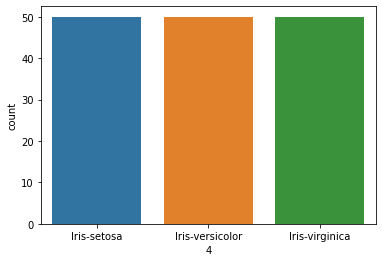

In [9]:
sns.countplot(x=dataset[4])

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-02.PNG?raw=true width=800>
</p>


#### **모델 생성**

In [29]:
from tensorflow.keras import models, layers, utils

def build_model():
 x= layers.Input(shape=(4))
 y= layers.Dense(12, activation='relu')(x)
 y= layers.Dense(8, activation='relu')(y)
 y= layers.Dense(3, activation='softmax')(y) # 이진분류 문제 경우, 마지막 레이어의 activation는 sigmoid 사용
 model = models.Model(x,y)

 return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

In [30]:
model =build_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 12)                60        
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 분류 문제는 기본적으로 crossentropy
  * 이진분류 : binary_crossentropy
  * 다중분류 : categorical_crossentropy
* `optimizer` : 
* `metrics`: 


In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy']) 


#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [33]:
model.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
11/11 [==============================] - 0s 4ms/step - loss: 0.3254 - accuracy: 0.8667
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.3158 - accuracy: 0.8762
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.3066 - accuracy: 0.8857
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.2985 - accuracy: 0.8762
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2912 - accuracy: 0.8762
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2835 - accuracy: 0.8857
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2767 - accuracy: 0.8857
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2701 - accuracy: 0.8857
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2639 - accuracy: 0.8857
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2582 - accuracy: 0.8857
Epoch 11/

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [34]:
model.evaluate(x_test, y_test)


2/2 [==============================] - 0s 7ms/step - loss: 0.1287 - accuracy: 0.9556


[0.12868571281433105, 0.9555555582046509]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [40]:
y_pred=model.predict(x_test)
print(y_test.shape, y_pred.shape)

y_test_argmax = np.argmax(y_test, axis=1) #세개 클래스 중 가장 큰 값 인덱스
y_pred_argmax = np.argmax(y_pred, axis=1)

for i in range(10): 
  print(f'{i}번째 실제y:{y_test[i]}-{y_test_argmax[i]},예측y:{y_pred_argmax[i]}')
#y_test.shape, y_pred.shape

(45, 3) (45, 3)
0번째 실제y:[1. 0. 0.]-0,예측y:0
1번째 실제y:[0. 1. 0.]-1,예측y:1
2번째 실제y:[0. 1. 0.]-1,예측y:1
3번째 실제y:[1. 0. 0.]-0,예측y:0
4번째 실제y:[0. 0. 1.]-2,예측y:2
5번째 실제y:[0. 1. 0.]-1,예측y:1
6번째 실제y:[0. 0. 1.]-2,예측y:2
7번째 실제y:[1. 0. 0.]-0,예측y:0
8번째 실제y:[1. 0. 0.]-0,예측y:0
9번째 실제y:[0. 0. 1.]-2,예측y:2


* 예측 시각화

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


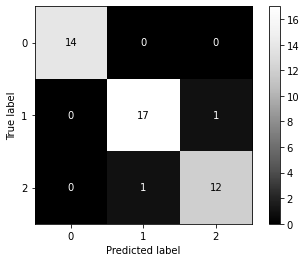

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 혼돈 행렬
cm = confusion_matrix(y_test_argmax, y_pred_argmax)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap = 'Greys_r')

## 과제
---

### | 과제1. 다중분류 문제 정리

* 예측값의 범위 : 0 또는 1
* 예측값의 shape : (샘플수,클래스 갯수)
* 아웃풋 레이어의 노드 개수 : 클래스 갯수
* 아웃풋 레이어의 activation : softmax
* 손실함수 (loss) : categorical_crossentropy
* 평가함수 (metrics) : accuracy

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

### | 과제 3. MNIST 숫자 데이터 분류

```
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
```

In [53]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
#정규화(x에 대해서만 정규화) 이미지 데이터: 0~255 -> 0~1
x_train= x_train/255.0
x_test = x_test/255.0

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


* 데이터 시각화

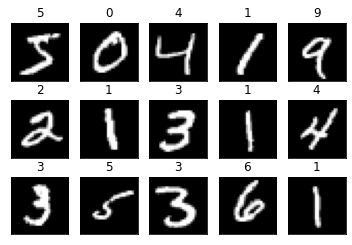

In [54]:
for i in range(15):
  img = x_train[i]
  label = y_train[i]
  plt.subplot(3,5,i+1)
  plt.imshow(img, cmap='gray')
  plt.title(label)
  plt.xticks([]);plt.yticks([])

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-03.PNG?raw=true width=500>
</p>


#### **모델 생성**

In [92]:
from tensorflow.keras import models, layers, utils
# 4 -> 12 -> 8 -> 3

def build_model():
  x = layers.Input(shape = (28, 28))
  y = layers.Flatten()(x)
  # 중간층
  y = layers.Dense(100, activation = 'relu')(y)
  y = layers.Dense(10, activation = 'softmax')(y) # 마지막 레이어에서 softmax 사용
  model = models.Model(x, y) 
 
  return model


#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

In [93]:
model = build_model()
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 
  * sparse_categorical_crossentropy: 원핫 인코딩을 안했을 때 사용가능
* `optimizer` : 
* `metrics`: 


In [94]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy']) 


#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [95]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2231 - accuracy: 0.9353
Epoch 2/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.0963 - accuracy: 0.9706
Epoch 3/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.0688 - accuracy: 0.9787
Epoch 4/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.0535 - accuracy: 0.9832
Epoch 5/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.0430 - accuracy: 0.9865
Epoch 6/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.0355 - accuracy: 0.9883
Epoch 7/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.0283 - accuracy: 0.9908
Epoch 8/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.0242 - accuracy: 0.9921
Epoch 9/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.0208 - accuracy: 0.9928
Epoch 10/10
6000/6000 [==============================] - 12s 2ms/step - l

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [96]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9777


[0.09858103841543198, 0.9776999950408936]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [98]:
y_pred=model.predict(x_test)
print(y_test.shape, y_pred.shape)
y_pred_argmax = np.argmax(y_pred, axis=1)

for i in range(10): 
  print(f'{i}번째 실제y:{y_test[i]},예측y:{y_pred_argmax[i]}')

(10000,) (10000, 10)
0번째 실제y:7,예측y:7
1번째 실제y:2,예측y:2
2번째 실제y:1,예측y:1
3번째 실제y:0,예측y:0
4번째 실제y:4,예측y:4
5번째 실제y:1,예측y:1
6번째 실제y:4,예측y:4
7번째 실제y:9,예측y:9
8번째 실제y:5,예측y:5
9번째 실제y:9,예측y:9


* 예측 시각화

[[ 972    1    1    1    0    1    1    1    1    1]
 [   0 1125    3    0    0    0    0    2    5    0]
 [   3    2 1001    2    5    1    2    6    9    1]
 [   0    0    6  986    0    4    0    6    8    0]
 [   0    0    4    1  965    0    1    0    3    8]
 [   3    0    0   15    2  854    6    4    6    2]
 [   5    3    3    1    7    5  925    1    7    1]
 [   2    4    7    2    0    0    0 1008    2    3]
 [   0    0    2    3    3    0    0    1  964    1]
 [   1    2    0    5    8    3    0    6    7  977]]


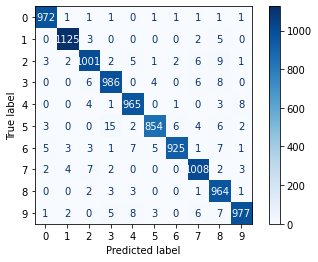

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 혼돈 행렬
cm = confusion_matrix(y_test, y_pred_argmax)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap = 'Blues')

* 모델 활용

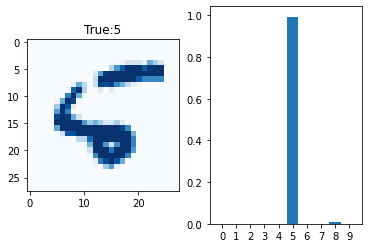

In [115]:
idx = 8 #n번째 샘플
img = x_test[idx]
label = y_test[idx]
pred = y_pred[idx] #[0.1,0.7,0.2...]
pred_argmax = y_pred_argmax[idx] #1

plt.subplot(121);plt.imshow(img, cmap='Blues'); plt.title(f'True:{label}')
plt.subplot(122);plt.bar(range(10), pred); plt.xticks(range(10))
plt.show()